# CIGRE TB 880 - 2022
## Power cable rating examples for calculation tool verification

Reference IEC standards:
- "IEC 60287-1-1, Electric Cables - Calculation of the Current Rating - Part 1-1: Current Rating Equations (100 % load factor) and Calculation of Losses – General", IEC,  2014-11.  
- "IEC 60287-2-1, Electric Cables – Calculation of the Current Rating – Part 2-1: Thermal Resistance – Calculation of Thermal Resistance, Edition 2.0", IEC, 2015-2.

In [1]:
# Import libraries
import math as mt
#import numpy as np
#import pandas as pd
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# 4. Introductory Case study 0

<div>
<img src="./img/img1_cs0.png" width="150"/>
</div>

**Input data:**

In [2]:
# 4.2.1 Grid parameters

U = 132 #[kv] Voltage level
f = 50 #[Hz] Frequency

<div>
<img src="./img/img2_xlpe132kV.png" width="300"/> <img src="./img/img3_cross.png" width="450"/>
</div>

In [3]:
# 4.2.2 Cable parameters

# List of the cable composition: [Conductor, Conductor_screen, XLPE_insulation, Insulation_screen, Sheath, Oversheath]
thk = [0, 1.5, 15.5, 1.3, 0.8, 3.5] #[mm] Thickness of the layer
dia = [0]*6 #[mm] Diammeter after the layer
dia[0] = 30.3 #[mm] Conductor diameter (630 mm2)

for i in range(1,len(dia)):
    dia[i] = dia[i-1] + 2*thk[i]

# Conductor
R_0 = 28.3e-6 #[Ohm/m] DC resistance at 20°C. From IEC 60228 Table 2
alpha_20 = 3.93e-3 #[K^-1] Temperature coefficient. From IEC 60287-1-1 Table 1 (Copper)
k_s = 1 # Skin effect coefficient (round stranded conductor and extruded insulation system). From IEC 60287-1-1 Table 2
k_p = 1 # Proximity effect coefficient (round stranded conductor and extruded insulation system). From IEC 60287-1-1 Table 2

# Insulation layer
epsilon = 2.5 # Relative permittivity. From IEC 60287-1-1 Table 3
tan_delta = 0.001 # Loss factor. From IEC 60287-1-1 Table 3
rho_i = 3.5 #[Km/W] Thermal resistivity. From CIGRE TB 640 Table 1
rho_sc = 2.5 #[Km/W] Thermal resistivity screen (semi-conducting layer). CIGRE WG B1.56, IEC 60949

# Metal sheath
t_s = thk[4] #[mm] From Manufacturer datasheet
rho_s_20 = 2.84e-8 #[Ohm/m] Resistivity at 20°c. From IEC 60287-1-1 Table 1
alpha_s_20 = 4.03e-3 #[K^-1] Temperature coefficient. From IEC 60287-1-1 Table 1 (Aluminium)

# Oversheath
rho_Tos = 3.5 #[Km/W] Thermal resistivity. From IEC 60287-2-1 Table 1

In [4]:
# 4.2.5 Operating conditions

theta_c_max = 90 #[°C] Maximum operating temperature of conductor. User
theta_a = 20 #[°C] Ambient ground temperature. From IEC 60287-3-1 Section 3.2.1
rho_Tsoil = 1 #[Km/W] Thermal resistivity. From IEC 60287-3-1 Section 3.2.2

## 4.6 CASE #0-1: Possible variations

### 4.6.4 Variant with non-neglected eddy-current losses 

This option was adopted by the CIGRE WG B1.56, not to neglect the eddy-current losses when the metal sheaths are bonded at both ends of an electrical section (Guidance Point 6).

### 4.4.1 Capacitance

$ C = \frac{\epsilon}{18\ln(\frac{D_i}{d_c})} 10^{-9} $ (F/m). From IEC 60287-1-1 Section 2.2

In [5]:
# 4.4.1 Capacitance

d_c = dia[1] #[mm] diameter of conductor, including screen, if any
D_i = dia[2] #[mm] external diameter of the insulation (excluding screen)

C = (epsilon/(18*mt.log(D_i/d_c)))*1e-9 #[F/m] From IEC 60287-1-1 Section 2.2
print("C = %.10E F/m" % C)

C = 2.1107662202E-10 F/m


In [6]:
# 4.4.2 Reactance

omega = 2*mt.pi*f #[rad/s] Angular frequency
s = dia[5] #[mm] distance between conductor axes in the electrical section being considered
d = D_i + 2*thk[3] + thk[4] #[mm] mean diameter of the sheath

X = 2*omega*1e-7*mt.log(2*s/d) #[Ohm/m] From IEC 60287-1-1 Section 2.3.1
print("X = %.10E \u03A9/m" % X)

X = 5.0403313985E-05 Ω/m


In [7]:
# 4.4.3 Electrical resistance of the metal sheath at 20°C

A_s = mt.pi*d*t_s #[mm2] cross section

R_s0 = rho_s_20/(A_s*1e-6) #[Ohm/m]
print("Rs0 = %.10E \u03A9/m" % R_s0)

Rs0 = 1.6691286499E-04 Ω/m


In [8]:
# 4.4.4 Thermal resistance between conductor and sheath

t_1 = thk[1:4] #[mm] insulation thickness
d_c_arr = dia[0:3] #[mm] diameter
rho_T = [rho_sc, rho_i, rho_sc] #[Km/W] Thermal resistivity
T1_layer = [0]*len(rho_T) #[Km/W] Thermal resistance

for i in range(len(T1_layer)):
    T1_layer[i] = (rho_T[i]/(2*mt.pi))*mt.log(1+2*t_1[i]/d_c_arr[i]) #[Km/W] From IEC 60287-2-1 Section 4.1.2.1

T1 = sum(T1_layer) #[Km/W]
print("T1 = %.10f Km/W" % T1)

T1 = 0.4198714890 Km/W


In [9]:
# 4.4.5 Thermal resistance of the oversheath

t_3 = thk[5] #[mm] oversheath thickness
D_a = dia[4] #[mm] reference diameter

T3 = (1/(2*mt.pi))*rho_Tos*mt.log(1+2*t_3/D_a) #[Km/W] From IEC 60287-2-1 Section 4.1.4.1
T3 = 1.6*T3 #[Km/W] From IEC 60287-2-1 Section 4.2.4.3.2
print("T3 = %.10f Km/W" % T3)

T3 = 0.0867193748 Km/W


In [10]:
# 4.4.6 External thermal resistance

L = 1000 #[mm]
u = 2*L/dia[5]
rho_T_ex = 1 #[Km/W]

T4 = 1.5/mt.pi*rho_T_ex*(mt.log(2*u)-0.630) #[Km/W] From IEC 60287-2-1 Section 4.2.4.3.2
print("T4 = %.10f Km/W" % T4)

T4 = 1.5946928925 Km/W


In [11]:
# 4.4.7 Dielectric losses

U_0 = U/mt.sqrt(3)*1e3 #[V]

W_d = omega*C*U_0**2*tan_delta #[W/m] From IEC 60287-1-1 Section 2.2
print("Wd = %.10f W/m" % W_d)

Wd = 0.3851382172 W/m


## 4.5 case #0-1: Results dependent on the temperature
### 4.5.1  Results linked to the maximum operating temperature
### 4.5.2 First iteration & 4.5.3 Next iterations

In [12]:
# Criteria of convergence
tempTol = 1e-11 #[K] Temperature tolerance threshold for convergence
currTol = 1e-11 #[A] Current tolerance threshold for convergence
maxIte = 10 # Maximum number of iterations

# Other parameters
n = 1 # Single-core cable
d_c = dia[0] # Conductor diameter
lambda_2 = 0 # The cable is unarmoured
T2 = 0 # The cable is unarmoured
# NOTE: IEC ArmoUred Cable is not the same that NEC(NFPA 70) Armored Cable (Type AC - Article 320), which is similar to Metal-Clad Cable (Type MC Article 330)

# Variable Preallocation
R = [0]*maxIte #[Ohm/m] AC resistance of conductor
R_s = [0]*maxIte #[Ohm/m] Resistance of sheath
lambda_1 = [0]*maxIte # Loss factor
I = [0]*maxIte #[A] Current rating
W_c = [0]*maxIte #[W/m] Conductor losses 
W_s = [0]*maxIte #[W/m] Sheath losses
theta_c = [0]*maxIte #[°C] Conductor operation temperature
theta_s = [0]*maxIte #[°C] Sheath temperature

# Initial values
theta_c[0] = theta_c_max # Maximum allowable conductor temperature
theta_s[0] = theta_c_max-10 # Assumption to initializate!

for i in range(maxIte):
    print("Iteration: %2d" % (i+1))
    # 4.5.1  Results linked to the maximum operating temperature
    # 4.5.1.1 DC resistance of conductor
    R_prime = R_0*(1+alpha_20*(theta_c[i]-20)) #[Ohm/m] From IEC 60287-1-1 Section 2.1.1
    #print("R' = %.10E W/m" % R_prime)
    
    # 4.5.1.2 Skin effect factor
    x_s = mt.sqrt(8*mt.pi*f/R_prime*1e-7*k_s) # From IEC 60287-1-1 Section 2.1.2
    # For 0 < x_s <= 2,8
    y_s = x_s**4/(192+0.8*x_s**4)
    #print("xs = %.10f\nys = %.10f" % (x_s, y_s))
    
    # 4.5.1.3 Proximity effect factor 
    x_p = mt.sqrt(8*mt.pi*f/R_prime*1e-7*k_p) # From IEC 60287-1-1 Section 2.1.4.1
    y_p = x_p**4/(192+0.8*x_p**4)*(d_c/s)**2*(0.312*(d_c/s)**2+1.18/(x_p**4/(192+0.8*x_p**4)+0.27))
    #print("xp = %.10f\nyp = %.10f" % (x_p, y_p))
    
    # 4.5.1.4 AC resistance of conductor 
    R[i] = R_prime*(1+y_s+y_p) #[Ohm/m] From IEC 60287-1-1 Section 2.1
    print("R = %.10E Ohm/m" % R[i])
    
    # 4.5.2 First iteration & 4.5.3 Next iterations    
    # 4.5.2.1 Resistance of sheath at operating temperature
    R_s[i] = R_s0*(1+alpha_s_20*(theta_s[i]-20)) #[Ohm/m] From IEC 60287-1-1 Section 2.3
    print("Rs = %.10E Ohm/m" % R_s[i])
    
    # 4.5.2.2 Losses caused by circulating currents
    lambda_1_prime = (R_s[i]/R[i])*(1/(1+(R_s[i]/X)**2)) # From IEC 60287-1-1 Section 2.3.1
    
    # 4.6.3.1 Losses caused by eddy currents (Dielectric losses taken into account)
    rho_s = rho_s_20*(1+alpha_s_20*(theta_s[i]-20)) #[Ohm/m]
    
    beta_1 = mt.sqrt(4*mt.pi*omega/(1e7*rho_s)) # From IEC 60287-1-1 Section 2.3.6.1
    m = (omega/R_s[i])*1e-7
    D_s = dia[4] # Diameter after metal sheath
    g_s = 1 + (t_s/D_s)**1.74*(beta_1*D_s*1e-3-1.6) # From IEC 60287-1-1 Section 2.3.6.1
    # For cables in trefoil formation
    lambda_0 = 3*(m**2/(1+m**2))*(d/(2*s))**2 # From IEC 60287-1-1 Section 2.3.6.1
    Delta_1 = (1.14*m**2.45+0.33)*(d/(2*s))**(0.92*m+1.66)
    Delta_2 = 0
    
    lambda_1_prime2 = R_s[i]/R[i]*(g_s*lambda_0*(1+Delta_1+Delta_2)+((beta_1*t_s)**4/12e12))
    
    # 4.6.4.1 Reduction of the eddy currents losses by the circulating currents 
    M = R_s[i]/X # From IEC 60287-1-1 Section 2.3.5
    N = M # For cables in trefoil formation
    F = (4*M**2*N**2+(M+N)**2)/(4*(M**2+1)*(N**2+1))
    
    lambda_1_prime2 = F*lambda_1_prime2
    
    lambda_1[i] = lambda_1_prime + lambda_1_prime2
    print("\u03BB1 = %.10f" % lambda_1[i])
    
    # 4.5.2.3 Permissible current rating
    Delta_theta = theta_c[i] - theta_a
    I[i] = mt.sqrt((Delta_theta-W_d*(0.5*T1+n*(T2+T3+T4)))/(R[i]*T1+n*R[i]*(1+lambda_1[i])*T2+n*R[i]*(1+lambda_1[i]+lambda_2)*(T3+T4))) #[A] From IEC 60287-1-1 Section 1.4.1.1
    print("I = %.10f A" % I[i])
    
    # 4.5.2.4 Losses in conductor and sheath
    W_c[i] = R[i]*I[i]**2 #[W/m]
    W_s[i] = lambda_1[i]*W_c[i] #[W/m]
    print("Wc = %.10f W/m\nWs = %.10f W/m" % (W_c[i], W_s[i]))
    
    # 4.5.2.5 Temperature on cable components
    theta_j = theta_a + n*(W_c[i]+W_s[i]+W_d)*T4 #[°C] Jacket. From IEC 60287-1-1 Section 1.4.1.1
    theta_s[i] = theta_j + n*(W_c[i]+W_s[i]+W_d)*T3 #[°C] Metal sheath
    theta_c[i] = theta_s[i] + n*(W_c[i]+W_d/2)*T1 #[°C] Conductor
    print("\u03B8j = %.10f °C\n\u03B8s = %.10f °C\n\u03B8c = %.10f °C" % (theta_j, theta_s[i], theta_c[i]))
    
    # Convergence evaluation
    Delta_theta_s = abs(theta_s[i] - theta_s[i-1])
    Delta_theta_c = abs(theta_c[i] - theta_c[i-1])
    Delta_theta1 = max(Delta_theta_s, Delta_theta_c)
    Delta_I = abs(I[i] - I[i-1])
    
    if (Delta_theta1 < tempTol) and (Delta_I < currTol):
        print("Convergence reached after %2d iterations" % (i+1))
        break
    elif i+1 == maxIte:
        print("Convergence criteria not reached after %2d iterations" % maxIte)
    else:
        theta_s[i+1] = theta_s[i] # Update for next iteration
        theta_c[i+1] = theta_c[i]

Iteration:  1
R = 3.9521526380E-05 Ohm/m
Rs = 2.0727239574E-04 Ohm/m
λ1 = 0.3654736398
I = 803.3635402401 A
Wc = 25.5069155968 W/m
Ws = 9.3221052841 W/m
θj = 76.1557692286 °C
θs = 79.2095190893 °C
θc = 90.0000000000 °C
Iteration:  2
R = 3.9521526380E-05 Ohm/m
Rs = 2.0674067176E-04 Ohm/m
λ1 = 0.3662997154
I = 803.1581818270 A
Wc = 25.4938769413 W/m
Ws = 9.3383998691 W/m
θj = 76.1609614361 °C
θs = 79.2149936490 °C
θc = 90.0000000000 °C
Iteration:  3
R = 3.9521526380E-05 Ohm/m
Rs = 2.0674435427E-04 Ohm/m
λ1 = 0.3662939825
I = 803.1596064582 A
Wc = 25.4939673828 W/m
Ws = 9.3382868431 W/m
θj = 76.1609254209 °C
θs = 79.2149556752 °C
θc = 90.0000000000 °C
Iteration:  4
R = 3.9521526380E-05 Ohm/m
Rs = 2.0674432873E-04 Ohm/m
λ1 = 0.3662940223
I = 803.1595965765 A
Wc = 25.4939667554 W/m
Ws = 9.3382876271 W/m
θj = 76.1609256707 °C
θs = 79.2149559386 °C
θc = 90.0000000000 °C
Iteration:  5
R = 3.9521526380E-05 Ohm/m
Rs = 2.0674432891E-04 Ohm/m
λ1 = 0.3662940220
I = 803.1595966450 A
Wc = 25.49396675

### Results

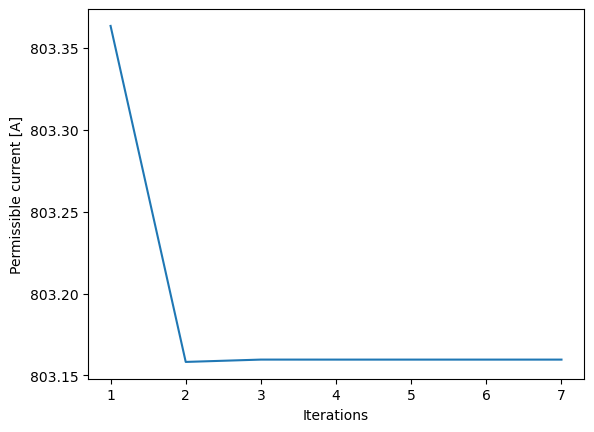

In [13]:
# Permissible current convergence plot
I = I[:i+1]

plt.figure()
plt.plot(list(range(1,i+2)),I)
plt.xlabel('Iterations')
plt.ylabel('Permissible current [A]')
plt.show()


In [14]:
# Permissible current rounding

if I[i] < 200:
    I_rating = int(I[i])
elif I[i] < 500:
    I_rating = int(I[i]/5)*5
else:
    I_rating = int(I[i]/10)*10
        
print("The permissible current rating of one conductor is equal to %5d A" % I_rating)

The permissible current rating of one conductor is equal to   800 A
